In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
# Assuming you have saved your dataset as a CSV file
data = pd.read_csv('/content/Medicalpremium.csv')


In [ ]:

# Step 3: Preprocessing
# Separate features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)  # All features except PremiumPrice
y = data['PremiumPrice']               # Target is PremiumPrice

# # Optional: Scaling features (Height, Weight)
# scaler = StandardScaler()
# X[['Height', 'Weight']] = scaler.fit_transform(X[['Height', 'Weight']])


In [ ]:

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R² score: {r2_xgb}")


XGBoost R² score: 0.8302394151687622


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predict using the tuned model
y_pred_rf = best_rf.predict(X_test)
print(f"Tuned Random Forest R²: {r2_score(y_test, y_pred_rf)}")


Tuned Random Forest R²: 0.8975611279235256


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)  # Select top 8 features
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)


LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Average R² score: {scores.mean()}")


Cross-validated R² scores: [0.66479036 0.56655126 0.46920733 0.59429792 0.69695925]
Average R² score: 0.5983612227256213


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.6 MB/s eta 0:00:00


X_train shape: (788, 10)
X_test shape: (198, 10)
X_train columns: Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')
X_test columns: Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')
NaN values in training data: 0
NaN values in testing data: 0
XGBoost R² score: 0.8302394151687622
Tuned Random Forest R²: 0.8753761208493045
Model saved successfully.


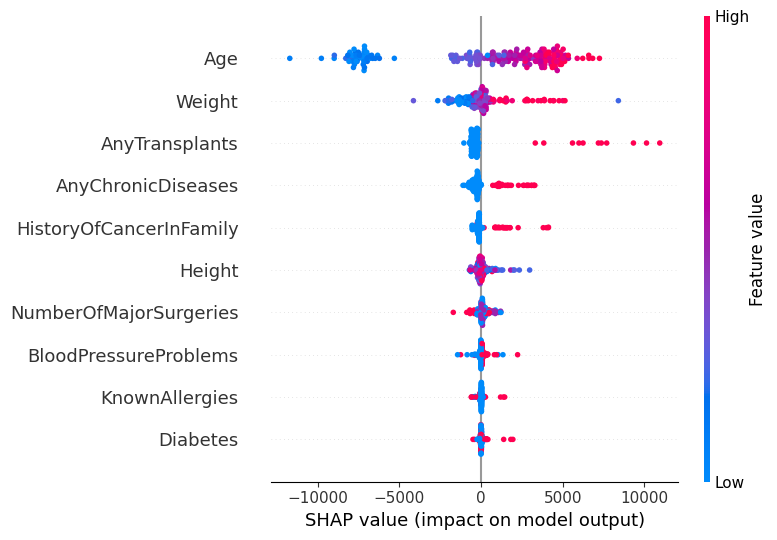

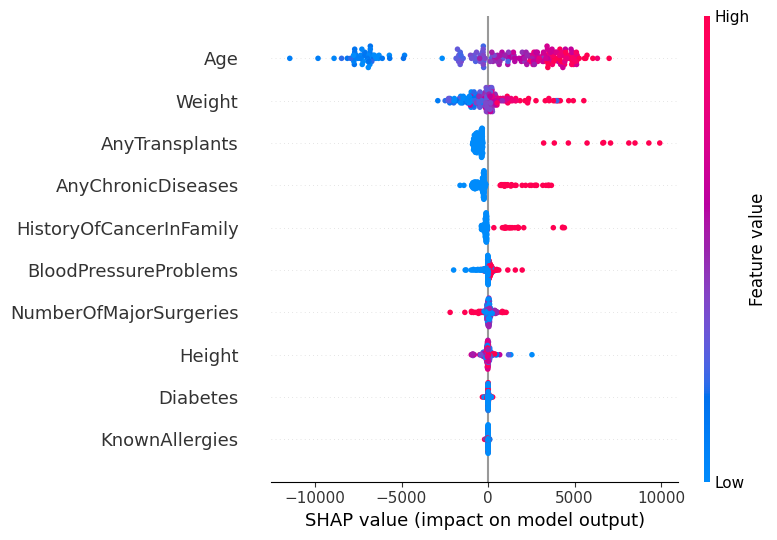

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import shap
import joblib

# Step 1: Load the dataset
data = pd.read_csv('/content/Medicalpremium.csv')

# Step 2: Preprocessing
X = data.drop('PremiumPrice', axis=1)  # All features except PremiumPrice
y = data['PremiumPrice']  # Target is PremiumPrice

# Optional: Scaling features (Height, Weight)
scaler = StandardScaler()
X[['Height', 'Weight']] = scaler.fit_transform(X[['Height', 'Weight']])

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Print shapes and feature names
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Check for NaN values
print("NaN values in training data:", X_train.isna().sum().sum())
print("NaN values in testing data:", X_test.isna().sum().sum())

# Step 4: Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R² score: {r2_xgb}")

# Step 5: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Tuned Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Step 6: Save the model
joblib.dump(rf_model, 'insurance_model.pkl')
print("Model saved successfully.")

# Step 7: SHAP analysis
# For XGBoost model
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

# Visualize SHAP values for XGBoost
shap.summary_plot(shap_values_xgb, X_test)

# For Random Forest model
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_test, check_additivity=False)  # Disable additivity check

# Visualize SHAP values for Random Forest
shap.summary_plot(shap_values_rf, X_test)


X_train shape: (788, 10)
X_test shape: (198, 10)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best R² score for Random Forest: 0.7751234231040094
Tuned Random Forest R²: 0.9008572492694619
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best R² score for XGBoost: 0.7546376466751099
Tuned XGBoost R² score: 0.8614007234573364
Models saved successfully.


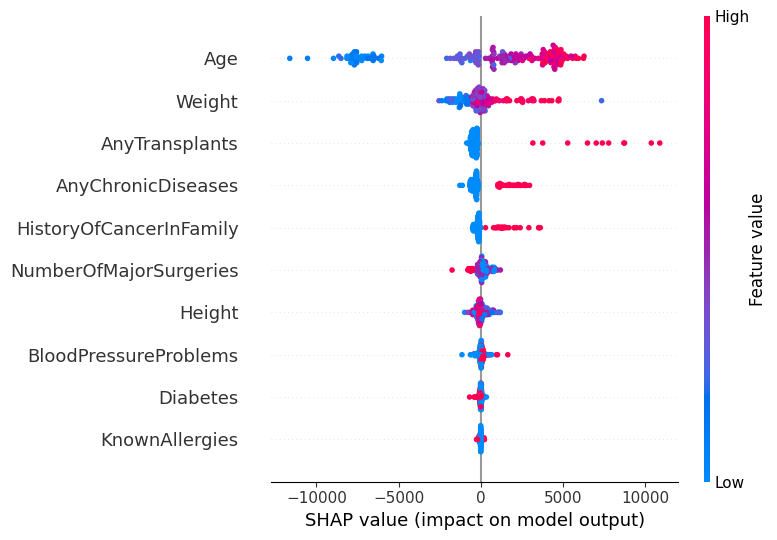

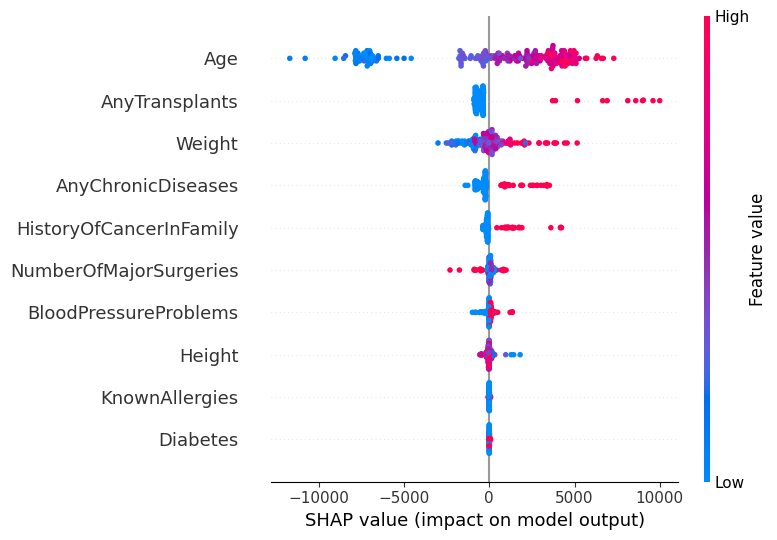

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import shap
import joblib

# Step 1: Load the dataset
data = pd.read_csv('/content/Medicalpremium.csv')

# Step 2: Preprocessing
X = data.drop('PremiumPrice', axis=1)  # All features except PremiumPrice
y = data['PremiumPrice']  # Target is PremiumPrice

# Optional: Scaling features (Height, Weight)
scaler = StandardScaler()
X[['Height', 'Weight']] = scaler.fit_transform(X[['Height', 'Weight']])

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Print shapes and feature names
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Step 4: Hyperparameter Tuning for Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
rf_grid_search.fit(X_train, y_train)

# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best R² score for Random Forest:", rf_grid_search.best_score_)

# Train the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(f"Tuned Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Step 5: Hyperparameter Tuning for XGBoost
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameters to tune
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Setup the grid search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
xgb_grid_search.fit(X_train, y_train)

# Best parameters and score for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best R² score for XGBoost:", xgb_grid_search.best_score_)

# Train the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print(f"Tuned XGBoost R² score: {r2_score(y_test, y_pred_xgb)}")

# Step 6: Save the best models
joblib.dump(best_rf_model, 'best_insurance_rf_model.pkl')
joblib.dump(best_xgb_model, 'best_insurance_xgb_model.pkl')
print("Models saved successfully.")

# Step 7: SHAP analysis
# For XGBoost model
explainer_xgb = shap.Explainer(best_xgb_model)
shap_values_xgb = explainer_xgb(X_test)

# Visualize SHAP values for XGBoost
shap.summary_plot(shap_values_xgb, X_test)

# For Random Forest model
explainer_rf = shap.Explainer(best_rf_model, X_train)
shap_values_rf = explainer_rf(X_test, check_additivity=False)  # Disable additivity check

# Visualize SHAP values for Random Forest
shap.summary_plot(shap_values_rf, X_test)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
import shap
from optuna import create_study
import joblib
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('/content/Medicalpremium.csv')

# Check the columns in the DataFrame
print("Columns in the dataset:", data.columns)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:", categorical_cols)

# Step 2: Feature Engineering
# Create new features
data['BMI'] = data['Weight'] / (data['Height'] ** 2)  # Calculate BMI
data['Height_Weight'] = data['Height'] * data['Weight']  # Interaction term

# One-hot encoding for categorical features
if 'SomeCategoricalFeature' in data.columns:
    data = pd.get_dummies(data, columns=['SomeCategoricalFeature'], drop_first=True)
else:
    print("Column 'SomeCategoricalFeature' not found. Please check the dataset.")

# Step 3: Preprocessing
# Separate features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)  # Features
y = data['PremiumPrice']  # Target variable

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Advanced Hyperparameter Tuning with Optuna
def objective(trial):
    model = XGBRegressor(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        subsample=trial.suggest_float('subsample', 0.5, 1.0)
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Create a study and optimize
study = create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Step 6: Ensemble Methods
# Base models for stacking
base_models = [
    ('xgb', XGBRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100))
]

# Stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Step 7: Cross-Validation Techniques
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(stacked_model, X_scaled, y, cv=skf, scoring='r2')
print(f"Cross-validated R² scores: {scores} \nAverage R² score: {scores.mean()}")

# Step 8: Regularization Techniques
# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Step 9: Model Selection with LightGBM
lgb_model = LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Step 10: Data Augmentation (for Imbalanced Data)
# Check class distribution
print("Original training set class distribution:", Counter(y_train))

# Apply SMOTE only if necessary
if len(set(y_train)) > 1 and y_train.value_counts().min() > 1:
    smote = SMOTE(k_neighbors=2)  # Reduce neighbors to avoid the error
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print("Resampled training set class distribution:", Counter(y_resampled))
else:
    print("Not enough samples to apply SMOTE. Using original training data.")
    X_resampled, y_resampled = X_train, y_train

# Step 11: Analyze Feature Importance

# Option 1: Analyze SHAP values for individual models in the stacking regressor
for name, model in base_models:
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Option 2: Use KernelExplainer for the stacked model
# Note: This approach may be slower
explainer = shap.KernelExplainer(stacked_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for the stacking model
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 12: Address Class Imbalance
rf_model = RandomForestRegressor(class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 13: Continuous Learning
# Save the stacked model for future use
joblib.dump(stacked_model, 'stacked_model.pkl')

# Load the model later for predictions
loaded_model = joblib.load('stacked_model.pkl')


[I 2024-10-09 03:56:32,195] A new study created in memory with name: no-name-e3f7efca-63b5-49a9-a339-ef37fbade1e4


Columns in the dataset: Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')
Categorical columns in the dataset: Index([], dtype='object')
Column 'SomeCategoricalFeature' not found. Please check the dataset.


[I 2024-10-09 03:56:40,131] Trial 0 finished with value: 0.8874005079269409 and parameters: {'n_estimators': 437, 'learning_rate': 0.14551521792904157, 'max_depth': 10, 'subsample': 0.8056261994356024}. Best is trial 0 with value: 0.8874005079269409.
[I 2024-10-09 03:56:40,592] Trial 1 finished with value: 0.8774423599243164 and parameters: {'n_estimators': 195, 'learning_rate': 0.24850824522792248, 'max_depth': 9, 'subsample': 0.9204897820505528}. Best is trial 0 with value: 0.8874005079269409.
[I 2024-10-09 03:56:41,203] Trial 2 finished with value: 0.87503582239151 and parameters: {'n_estimators': 338, 'learning_rate': 0.18414301903726532, 'max_depth': 8, 'subsample': 0.7082847186136862}. Best is trial 0 with value: 0.8874005079269409.
[I 2024-10-09 03:56:41,707] Trial 3 finished with value: 0.8823288083076477 and parameters: {'n_estimators': 228, 'learning_rate': 0.16953432784033792, 'max_depth': 9, 'subsample': 0.9372279535712277}. Best is trial 0 with value: 0.8874005079269409.
[

Cross-validated R² scores: [0.74929938 0.77950744 0.76848696 0.77316792 0.81476099] 
Average R² score: 0.7770445380134365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 12
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.907e+09, tolerance: 2.999e+06
  model = cd_fast.enet_coordinate_descent(


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

[I 2024-10-09 04:04:55,554] A new study created in memory with name: no-name-bf345199-1811-4f49-8eac-94dec256e401


Columns in the dataset: Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')
Categorical columns in the dataset: Index([], dtype='object')
Column 'SomeCategoricalFeature' not found. Please check the dataset.


[I 2024-10-09 04:04:59,796] Trial 0 finished with value: 0.8861170411109924 and parameters: {'n_estimators': 165, 'learning_rate': 0.10653013312456779, 'max_depth': 8, 'subsample': 0.9966995642612948}. Best is trial 0 with value: 0.8861170411109924.
[I 2024-10-09 04:04:59,854] Trial 1 finished with value: 0.8461822867393494 and parameters: {'n_estimators': 129, 'learning_rate': 0.14816624465129566, 'max_depth': 3, 'subsample': 0.6462661143174839}. Best is trial 0 with value: 0.8861170411109924.
[I 2024-10-09 04:05:00,089] Trial 2 finished with value: 0.8554171919822693 and parameters: {'n_estimators': 243, 'learning_rate': 0.2007464196381489, 'max_depth': 6, 'subsample': 0.5594901518177497}. Best is trial 0 with value: 0.8861170411109924.
[I 2024-10-09 04:05:00,359] Trial 3 finished with value: 0.8903622627258301 and parameters: {'n_estimators': 158, 'learning_rate': 0.08402230968017806, 'max_depth': 8, 'subsample': 0.5792985154645698}. Best is trial 3 with value: 0.8903622627258301.
[

Cross-validated R² scores: [0.74703612 0.77485958 0.76798468 0.77641927 0.81395044] 
Average R² score: 0.7760500167224714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 12
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.907e+09, tolerance: 2.999e+06
  model = cd_fast.enet_coordinate_descent(


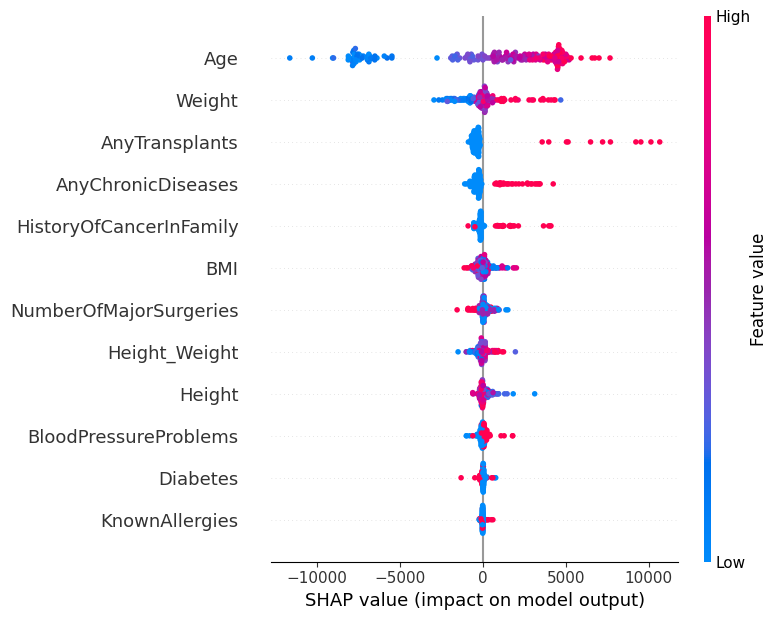

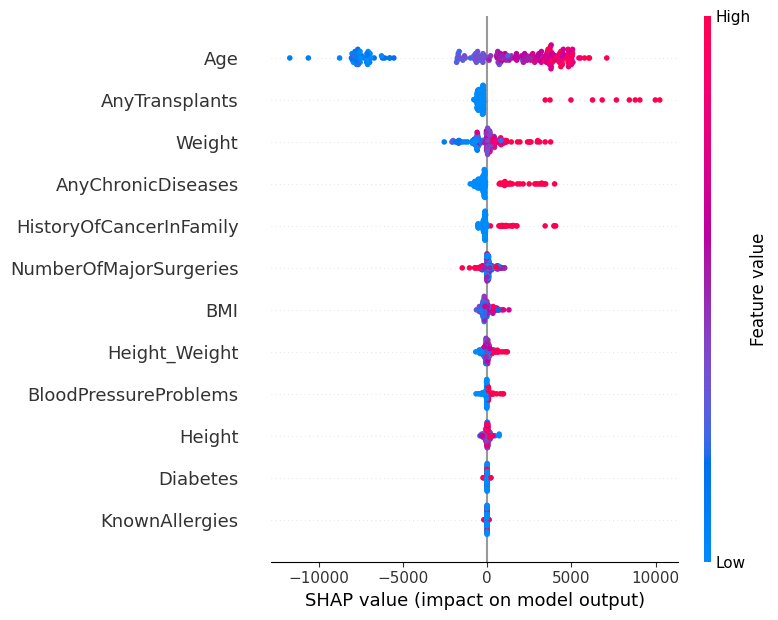

  0%|          | 0/198 [00:00<?, ?it/s]

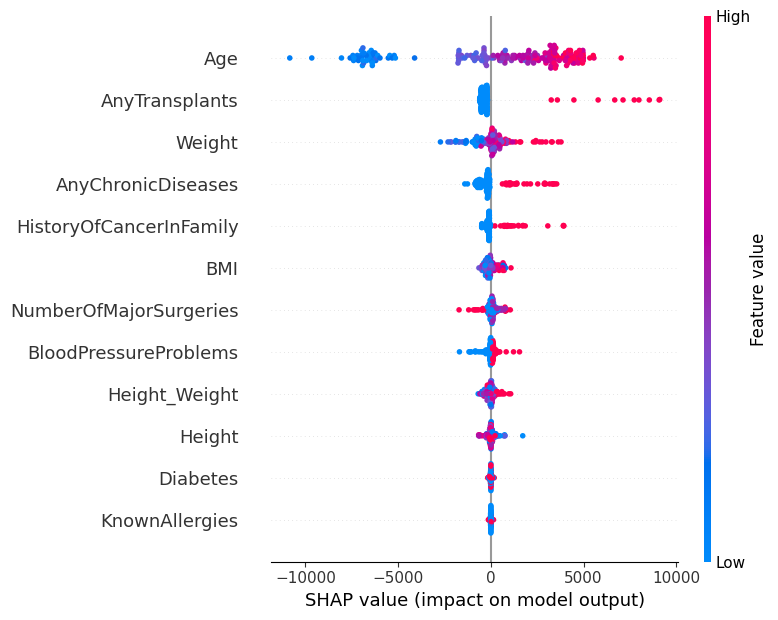

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'class_weight'

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
import shap
from optuna import create_study
import joblib
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('/content/Medicalpremium.csv')

# Check the columns in the DataFrame
print("Columns in the dataset:", data.columns)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:", categorical_cols)

# Step 2: Feature Engineering
# Create new features
data['BMI'] = data['Weight'] / (data['Height'] ** 2)  # Calculate BMI
data['Height_Weight'] = data['Height'] * data['Weight']  # Interaction term

# One-hot encoding for categorical features
if 'SomeCategoricalFeature' in data.columns:
    data = pd.get_dummies(data, columns=['SomeCategoricalFeature'], drop_first=True)
else:
    print("Column 'SomeCategoricalFeature' not found. Please check the dataset.")

# Step 3: Preprocessing
# Separate features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)  # Features
y = data['PremiumPrice']  # Target variable

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Advanced Hyperparameter Tuning with Optuna
def objective(trial):
    model = XGBRegressor(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        subsample=trial.suggest_float('subsample', 0.5, 1.0)
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Create a study and optimize
study = create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Step 6: Ensemble Methods
# Base models for stacking
base_models = [
    ('xgb', XGBRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100)),

]

# Stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Step 7: Cross-Validation Techniques
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(stacked_model, X_scaled, y, cv=skf, scoring='r2')
print(f"Cross-validated R² scores: {scores} \nAverage R² score: {scores.mean()}")

# Step 8: Regularization Techniques
# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Step 9: Model Selection with LightGBM
lgb_model = LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)

# Step 10: Data Augmentation (for Imbalanced Data)
# Check class distribution
print("Original training set class distribution:", Counter(y_train))

# Apply SMOTE only if necessary
if len(set(y_train)) > 1 and y_train.value_counts().min() > 1:
    smote = SMOTE(k_neighbors=2)  # Reduce neighbors to avoid the error
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print("Resampled training set class distribution:", Counter(y_resampled))
else:
    print("Not enough samples to apply SMOTE. Using original training data.")
    X_resampled, y_resampled = X_train, y_train

# Step 11: Analyze Feature Importance
# Option 1: Analyze SHAP values for individual models in the stacking regressor
for name, model in base_models:
    model.fit(X_train, y_train)  # Ensure the model is fitted before using SHAP
    if isinstance(model, (XGBRegressor, RandomForestRegressor)):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.Explainer(model)

    # Calculate SHAP values
    shap_values = explainer(X_test)

    # Create summary plot
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Option 2: Use KernelExplainer for the stacked model
# Note: This approach may be slower
explainer = shap.KernelExplainer(stacked_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for the stacking model
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# Step 13: Continuous Learning
# Save the stacked model for future use
joblib.dump(stacked_model, 'stacked_model.pkl')

# Load the model later for predictions
loaded_model = joblib.load('stacked_model.pkl')

# Step 12: Address Class Imbalance
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 13: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 14: Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 15: Print final metrics
print("Final Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming `predictions` contains the model's predictions and `y_test` is the actual target values

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


In [ ]:
# Step 12: Address Class Imbalance
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# Step 13: Continuous Learning
# Save the stacked model for future use
joblib.dump(stacked_model, 'stacked_model.pkl')

# Load the model later for predictions
loaded_model = joblib.load('stacked_model.pkl')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 13: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 14: Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 15: Print final metrics
print("Final Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming `predictions` contains the model's predictions and `y_test` is the actual target values

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')



Final Metrics:
Mean Absolute Error (MAE): 974.65
Mean Squared Error (MSE): 4306384.85
R² Score: 0.90


Mean Absolute Error (MAE): 2704.218237058081
Mean Squared Error (MSE): 13037466.766622573
Root Mean Squared Error (RMSE): 3610.7432429657156
R-squared (R²): 0.6942632794380188


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare your dataset
data = pd.read_csv('Medicalpremium.csv')
X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define an enhanced model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {test_loss}')


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 641168448.0000 - val_loss: 629685056.0000
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 613811072.0000 - val_loss: 629660864.0000
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 642563712.0000 - val_loss: 629626944.0000
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 628051968.0000 - val_loss: 629580608.0000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 609745024.0000 - val_loss: 629519872.0000
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 629015872.0000 - val_loss: 629444160.0000
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 639246528.0000 - val_loss: 629346432.0000
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 618619840.0000 - val_loss: 629232576.0000
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 613872000.0000 - val_loss: 629093120.0000
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619984576.0000 - val_loss: 

In [19]:
# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

# In the search function, remove the hp.Int() for batch_size and directly provide a fixed batch size, or tune it inside the function.
tuner.search(X_train_scaled, y_train,
             epochs=100,
             validation_split=0.2,
             batch_size=32)  # This should be set explicitly or made tunable inside build_model()


Trial 10 Complete [00h 00m 16s]
val_loss: 444212352.0

Best val_loss So Far: 10589699.0
Total elapsed time: 00h 03m 05s


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.6942632794380188
Mean Absolute Error (MAE): 2704.218237058081
Root Mean Squared Error (RMSE): 3610.7432429657156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
!pip install shap
!pip install optuna
!pip install lightgbm
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


[I 2024-10-15 07:56:34,554] A new study created in memory with name: no-name-0e405813-07f6-4bc3-af39-0e9c8504b84d


Columns in the dataset: Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')
Categorical columns in the dataset: Index([], dtype='object')
Column 'SomeCategoricalFeature' not found. Please check the dataset.


[I 2024-10-15 07:56:34,784] Trial 0 finished with value: 0.8575025200843811 and parameters: {'n_estimators': 222, 'learning_rate': 0.25702509431168014, 'max_depth': 5, 'subsample': 0.5136951320398055}. Best is trial 0 with value: 0.8575025200843811.
[I 2024-10-15 07:56:35,419] Trial 1 finished with value: 0.870367169380188 and parameters: {'n_estimators': 463, 'learning_rate': 0.29225822704946597, 'max_depth': 7, 'subsample': 0.5148447520205719}. Best is trial 1 with value: 0.870367169380188.
[I 2024-10-15 07:56:35,843] Trial 2 finished with value: 0.8837485909461975 and parameters: {'n_estimators': 285, 'learning_rate': 0.047205730384142844, 'max_depth': 8, 'subsample': 0.5930448162810635}. Best is trial 2 with value: 0.8837485909461975.
[I 2024-10-15 07:56:35,958] Trial 3 finished with value: 0.8917213082313538 and parameters: {'n_estimators': 104, 'learning_rate': 0.15449971306707924, 'max_depth': 6, 'subsample': 0.9698684949534943}. Best is trial 3 with value: 0.8917213082313538.
[

Cross-validated R² scores: [0.75111057 0.78397931 0.77088865 0.76633721 0.82229726] 
Average R² score: 0.7789226016361639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 12
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.907e+09, tolerance: 2.999e+06
  model = cd_fast.enet_coordinate_descent(


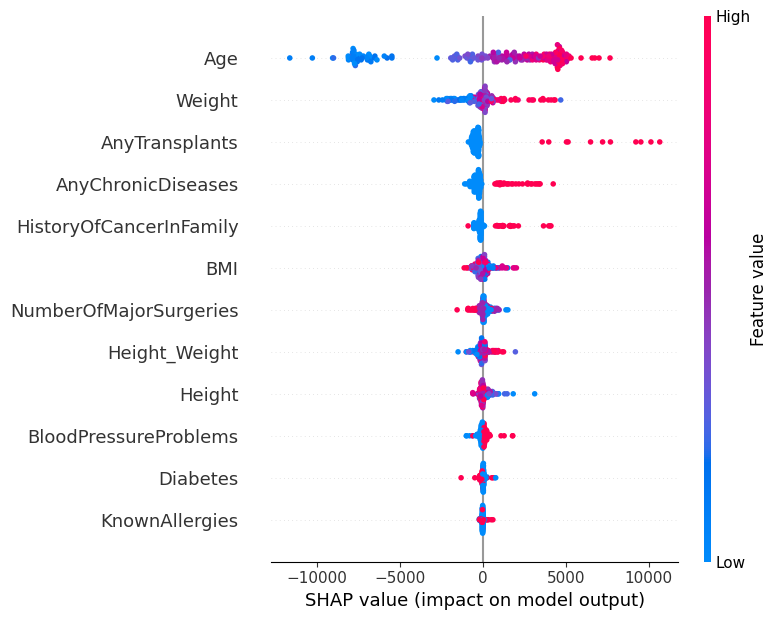

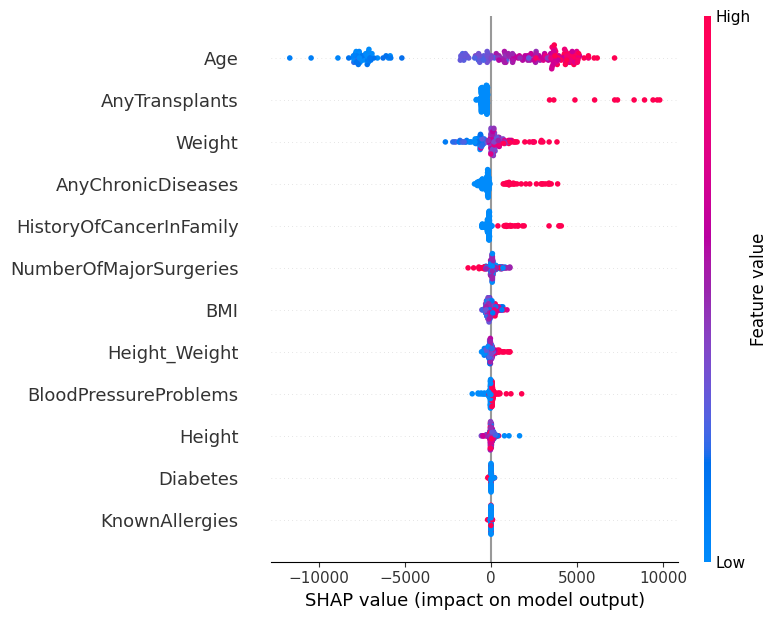

  0%|          | 0/198 [00:00<?, ?it/s]

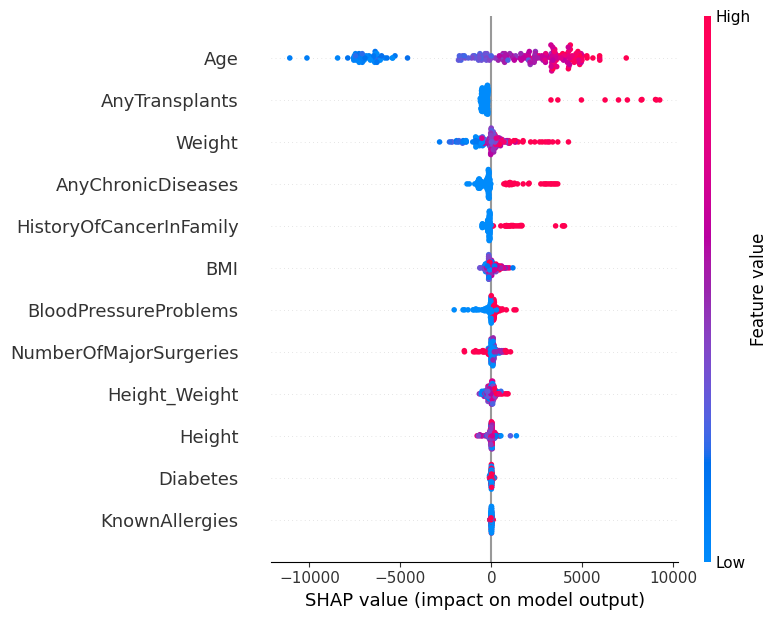

Final Metrics:
Mean Absolute Error (MAE): 1000.16
Mean Squared Error (MSE): 4293539.84
Root Mean Squared Error (RMSE): 2072.09
R² Score: 0.90


In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
import shap
from optuna import create_study
import joblib
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('Medicalpremium.csv')

# Check the columns in the DataFrame
print("Columns in the dataset:", data.columns)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:", categorical_cols)

# Step 2: Feature Engineering
# Create new features
data['BMI'] = data['Weight'] / (data['Height'] ** 2)  # Calculate BMI
data['Height_Weight'] = data['Height'] * data['Weight']  # Interaction term

# One-hot encoding for categorical features
if 'SomeCategoricalFeature' in data.columns:
    data = pd.get_dummies(data, columns=['SomeCategoricalFeature'], drop_first=True)
else:
    print("Column 'SomeCategoricalFeature' not found. Please check the dataset.")

# Step 3: Preprocessing
# Separate features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)  # Features
y = data['PremiumPrice']  # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Advanced Hyperparameter Tuning with Optuna
def objective(trial):
    model = XGBRegressor(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        subsample=trial.suggest_float('subsample', 0.5, 1.0)
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Create a study and optimize
study = create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Step 6: Ensemble Methods (Stacking with Weighted Averaging)
# Base models for stacking
base_models = [
    ('xgb', XGBRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100)),
]

# Stacking model with Linear Regression as meta-learner
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Step 7: Cross-Validation Techniques
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(stacked_model, X_scaled, y, cv=skf, scoring='r2')
print(f"Cross-validated R² scores: {scores} \nAverage R² score: {scores.mean()}")

# Step 8: Regularization Techniques (Ridge and Lasso)
# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Step 9: Model Selection with LightGBM
lgb_model = LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)

# Step 10: Data Augmentation (for Imbalanced Data) with SMOTE
# Check class distribution
print("Original training set class distribution:", Counter(y_train))

# Apply SMOTE only if necessary
if len(set(y_train)) > 1 and y_train.value_counts().min() > 1:
    smote = SMOTE(k_neighbors=2)  # Reduce neighbors to avoid the error
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print("Resampled training set class distribution:", Counter(y_resampled))
else:
    print("Not enough samples to apply SMOTE. Using original training data.")
    X_resampled, y_resampled = X_train, y_train

# Step 11: Analyze Feature Importance with SHAP
# Option 1: Analyze SHAP values for individual models in the stacking regressor
for name, model in base_models:
    model.fit(X_train, y_train)  # Ensure the model is fitted before using SHAP
    explainer = shap.TreeExplainer(model) if isinstance(model, (XGBRegressor, RandomForestRegressor)) else shap.Explainer(model)

    # Calculate SHAP values
    shap_values = explainer(X_test)

    # Create summary plot
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Option 2: Use KernelExplainer for the stacked model
# This approach may be slower
explainer = shap.KernelExplainer(stacked_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for the stacking model
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 12: Continuous Learning (Save the model)
joblib.dump(stacked_model, 'stacked_model.pkl')

# Load the model later for predictions
loaded_model = joblib.load('stacked_model.pkl')

# Step 13: Make predictions on the test set
y_pred = stacked_model.predict(X_test)

# Step 14: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 15: Print final metrics
print("Final Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


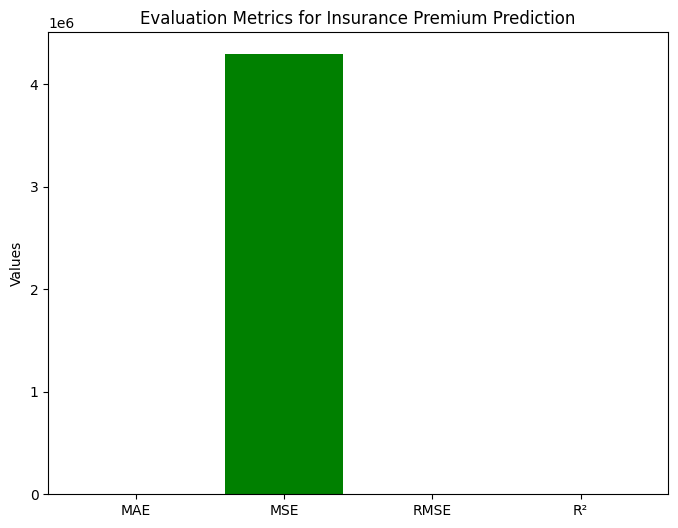

In [28]:
import matplotlib.pyplot as plt

# Step 16: Visualization
# 1. Plot evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics for Insurance Premium Prediction')
plt.ylabel('Values')
plt.show()



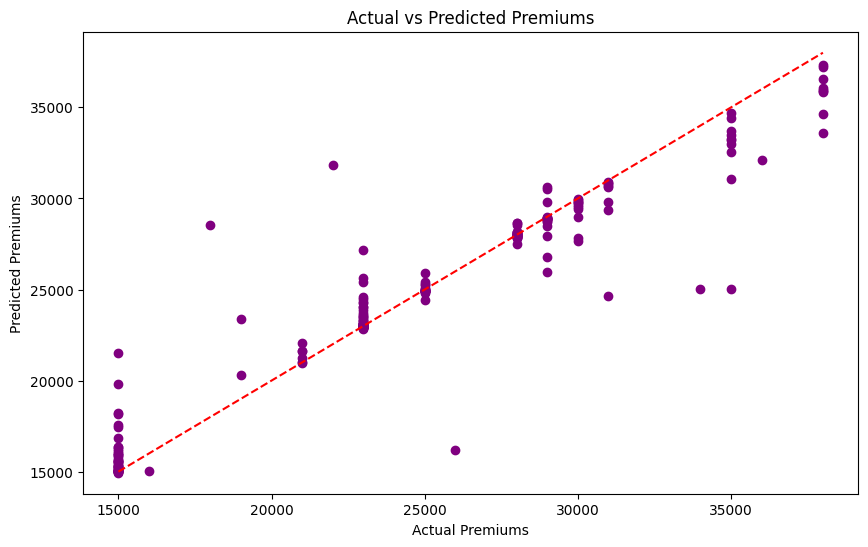

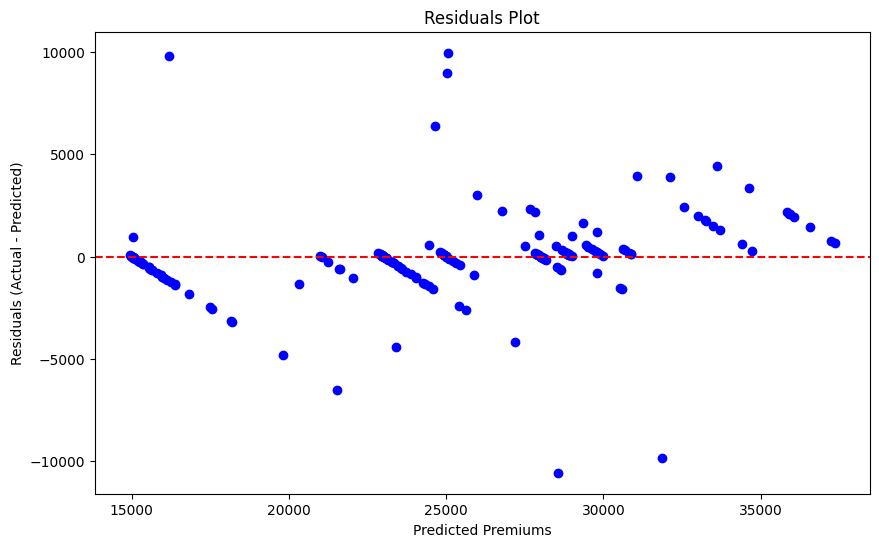

In [29]:
# 2. Plot Actual vs Predicted Premiums
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line y=x
plt.title('Actual vs Predicted Premiums')
plt.xlabel('Actual Premiums')
plt.ylabel('Predicted Premiums')
plt.show()

# 3. Residual Plot (Error Analysis)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Premiums')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.907e+09, tolerance: 2.999e+06
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 12
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

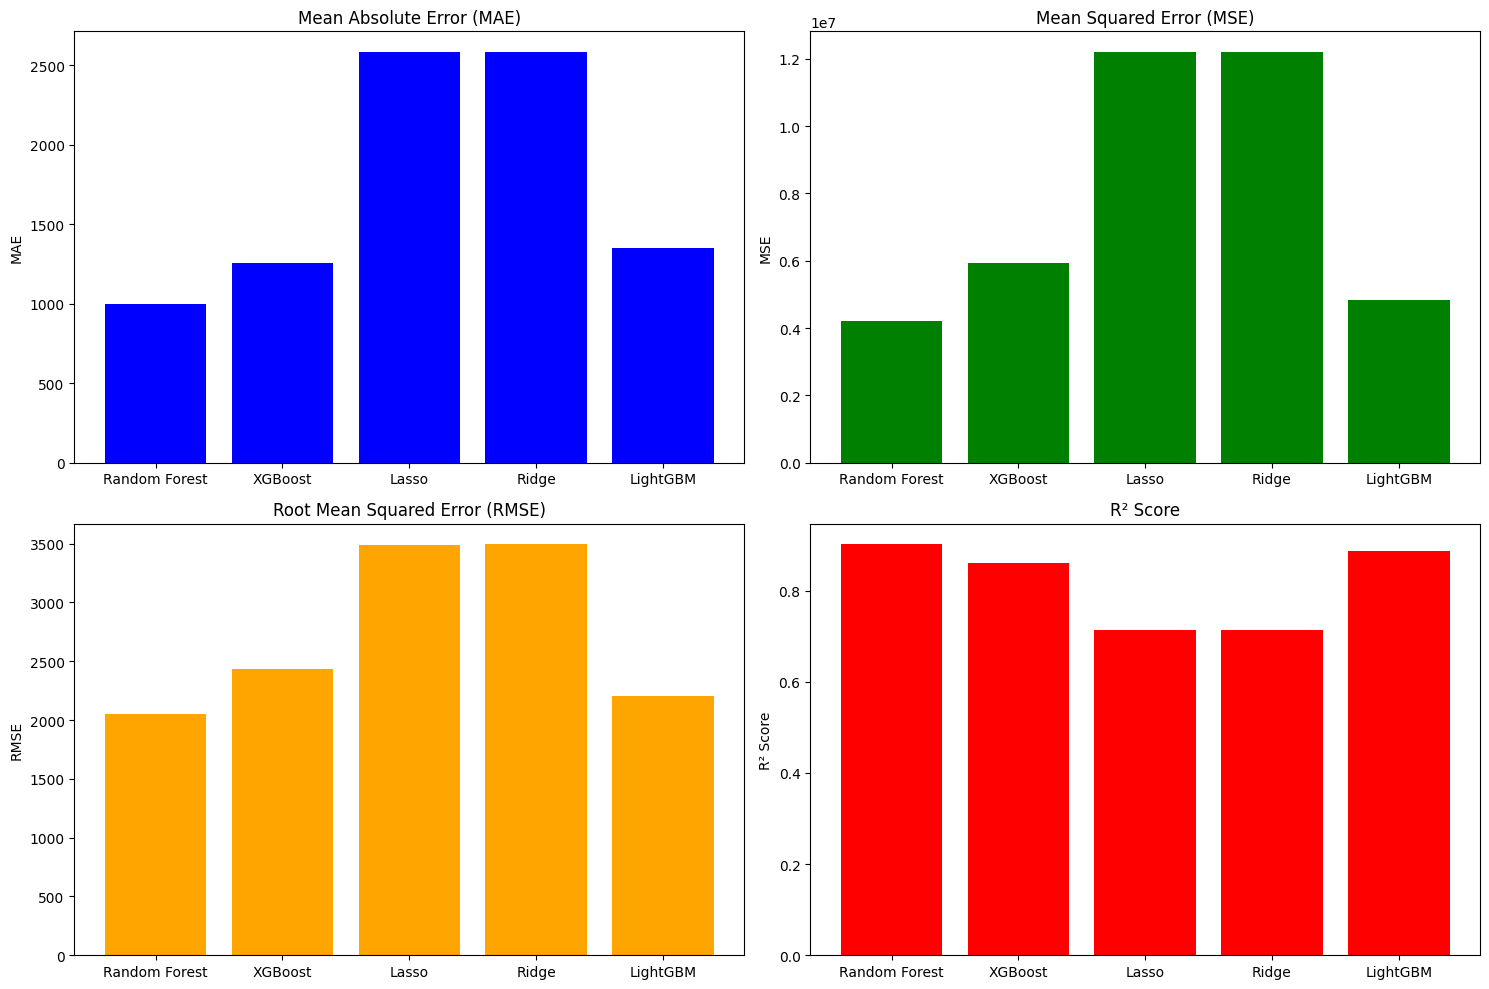

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume the following models are trained
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost': XGBRegressor(n_estimators=100),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'LightGBM': LGBMRegressor(n_estimators=100)
}

# Train models, store predictions, and compute metrics
model_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R² Score': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    model_metrics['Model'].append(model_name)
    model_metrics['MAE'].append(mae)
    model_metrics['MSE'].append(mse)
    model_metrics['RMSE'].append(rmse)
    model_metrics['R² Score'].append(r2)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display table with all metrics
print(metrics_df)

# Plot the metrics for each model
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot MAE
ax[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color='blue')
ax[0, 0].set_title('Mean Absolute Error (MAE)')
ax[0, 0].set_ylabel('MAE')

# Plot MSE
ax[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color='green')
ax[0, 1].set_title('Mean Squared Error (MSE)')
ax[0, 1].set_ylabel('MSE')

# Plot RMSE
ax[1, 0].bar(metrics_df['Model'], metrics_df['RMSE'], color='orange')
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_ylabel('RMSE')

# Plot R² Score
ax[1, 1].bar(metrics_df['Model'], metrics_df['R² Score'], color='red')
ax[1, 1].set_title('R² Score')
ax[1, 1].set_ylabel('R² Score')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
